In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [3]:
pd.set_option('max_columns', 100)

### Load Data

In [4]:
cosdist = pd.read_csv('./cosdist/cosdist_output.csv', 
                      names=['op','post_id','challenger','comment_id','created_utc','delta_awarded','cosineDist'])

In [5]:
train = pd.read_csv('./linguistic-features/linguistic_results.csv', index_col=False)
test = pd.read_csv('./linguistic-features/linguistic_results_holdout.csv', index_col=False)

In [6]:
X_train = train.drop(columns=['op','post_id','challenger','comment_id','delta_awarded'], axis=1).to_numpy().copy()
y_train = train['delta_awarded'].to_numpy().copy()
y_train[y_train == 0] = -1

In [7]:
X_test = test.drop(columns=['op','post_id','challenger','comment_id','delta_awarded'], axis=1).to_numpy().copy()
y_test = test['delta_awarded'].to_numpy().copy()
y_test[y_test == 0] = -1

In [8]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

ValueError: Found array with 0 sample(s) (shape=(0, 37)) while a minimum of 1 is required by StandardScaler.

## T-test

In [51]:
import statsmodels.api as sm
print("Statsmodel T-Test Results")
print(sm.stats.ttest_ind(pos, neg, usevar='unequal'))

from scipy import stats
print("Scipy T-Test Results")
print(stats.ttest_ind(pos, neg, equal_var=False))

Statsmodel T-Test Results
(1.4164958081484489, 0.15683486743503205, 1523.1486466100716)
Scipy T-Test Results
Ttest_indResult(statistic=1.4164958081484489, pvalue=0.15683486743503205)


In [47]:
print("Statsmodel T-Test Results")
print(sm.stats.ttest_ind(pos_bin1, neg_bin1, usevar='unequal'))

Statsmodel T-Test Results
(0.33263590734349574, 0.7395942174585488, 376.5963522754103)


In [49]:
print("Statsmodel T-Test Results")
print(sm.stats.ttest_ind(pos_bin2, neg_bin2, usevar='unequal'))

Statsmodel T-Test Results
(-0.3709615521975772, 0.7109190260958722, 310.6343311328505)


In [50]:
print("Statsmodel T-Test Results")
print(sm.stats.ttest_ind(pos_bin3, neg_bin3, usevar='unequal'))

Statsmodel T-Test Results
(nan, nan, nan)


/anaconda3/envs/data558/lib/python3.7/site-packages/statsmodels/stats/weightstats.py:849: RuntimeWarning: invalid value encountered in double_scalars
  z1 = (sem1 / semsum)**2 / (d1.nobs - 1)
/anaconda3/envs/data558/lib/python3.7/site-packages/statsmodels/stats/weightstats.py:850: RuntimeWarning: invalid value encountered in double_scalars
  z2 = (sem2 / semsum)**2 / (d2.nobs - 1)
/anaconda3/envs/data558/lib/python3.7/site-packages/statsmodels/stats/weightstats.py:616: RuntimeWarning: invalid value encountered in double_scalars
  tstat = (value1 - value2 - diff) / std_diff


### Descriptive Statistics

In [30]:
df.groupby(['delta_awarded']).agg({'delta_awarded':'count'})

,delta_awarded
delta_awarded,
0,2401
1,2277


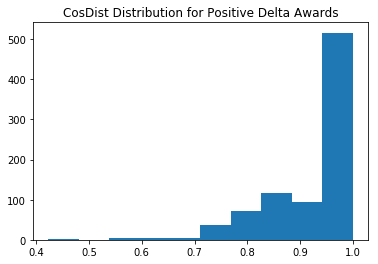

In [11]:
plt.hist(df[df['delta_result'] == 1]['cosDist'], bins=10)
plt.title('CosDist Distribution for Positive Delta Awards');

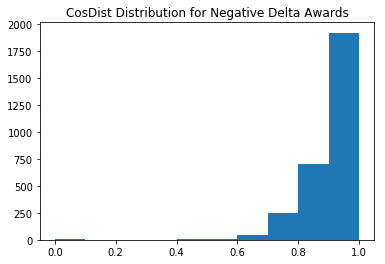

In [12]:
plt.hist(df[df['delta_result'] == 0]['cosDist'], bins=10)
plt.title('CosDist Distribution for Negative Delta Awards');

### Logistic Regression Model

Predict: Delta awarded or not

Features: linguistic features

In [8]:
from sklearn.linear_model import LogisticRegressionCV
delta_clf = LogisticRegressionCV(Cs=10, penalty='l2', fit_intercept=False, cv=5, class_weight='balanced',
                                 max_iter=1e3)
delta_clf.fit(X_train, y_train)
delta_clf.score(X_test, y_test)

0.5508072174738842

In [9]:
from sklearn.metrics import classification_report
y_pred = delta_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.54      0.69      0.61       530
           1       0.57      0.41      0.47       523

   micro avg       0.55      0.55      0.55      1053
   macro avg       0.55      0.55      0.54      1053
weighted avg       0.55      0.55      0.54      1053



In [10]:
from sklearn.metrics import roc_auc_score
y_pred = delta_clf.predict(X_test)
print(roc_auc_score(y_test, y_pred))

0.5498593022836321
